# **Fashion Product Classification using CNN Feature Extraction + SVM**

## **Objective**
This notebook trains a **supervised learning model** to classify **fashion product subcategories** based on image data.
We use **ResNet50** (a pre-trained CNN) for **feature extraction** and then train an **SVM classifier** to predict the subcategory.

In [29]:
!pip install tensorflow keras scikit-learn pandas numpy matplotlib opencv-python pillow

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import joblib

In [31]:
IMAGE_DIR =r"C:\FashionRecommendationsSystem\Dataset\resized_images"
CSV_FILE = r"C:\FashionRecommendationsSystem\Dataset\fashion_products_cleaned.csv" 

In [32]:
df = pd.read_csv(CSV_FILE)

print("Dataset Info:")
print(df.info())

# Display first few rows
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30849 entries, 0 to 30848
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   image_filename   30849 non-null  object 
 1   id               30849 non-null  float64
 2   subCategory      30849 non-null  object 
 3   price            30849 non-null  float64
 4   discountedPrice  30849 non-null  float64
 5   brandName        30849 non-null  object 
 6   ageGroup         30848 non-null  object 
 7   gender           30849 non-null  object 
 8   baseColour       30843 non-null  object 
 9   season           30828 non-null  object 
dtypes: float64(3), object(7)
memory usage: 2.4+ MB
None


image_filename       id subCategory   price  discountedPrice  \
0      31973.jpg  31973.0       Shoes  4495.0           4495.0   
1      30778.jpg  30778.0     Topwear   430.0            430.0   
2      19812.jpg  19812.0     Topwear  2399.0           2399.0   
3      22735.jpg  22735.0       Shoes  5695.0           5695.0   
4      38246.jpg  38246.0     Topwear   499.0            399.0   

         brandName      ageGroup gender baseColour  season  
0             Nike    Adults-Men    Men      Black  Summer  
1         Fabindia    Adults-Men    Men      Green  Summer  
2  U.S. Polo Assn.    Adults-Men    Men  Navy Blue    Fall  
3             Nike  Adults-Women  Women       Grey    Fall  
4           Batman     Kids-Boys   Boys      Green  Summer

In [ ]:
# Map Images to Labels and Features
image_paths = []
labels = []
metadata = []  # Store brand, age group, gender, base color, season


for _, row in df.iterrows():
    img_filename = row["image_filename"]
    img_path = os.path.join(IMAGE_DIR, img_filename)

    if os.path.exists(img_path):
        image_paths.append(img_path)
        labels.append(row["subCategory"])
        metadata.append((row["brandName"], row["ageGroup"], row["gender"], row["baseColour"], row["season"]))

print(f"Total Images Found: {len(image_paths)}")

Total Images Found: 30849


In [ ]:
image_paths = []

for _, row in df.iterrows():
    img_filename = row["image_filename"]
    img_path = os.path.join(IMAGE_DIR, img_filename)

    if os.path.exists(img_path):
        image_paths.append(img_path)

np.save("image_paths.npy", np.array(image_paths))

print(f"Successfully saved image_paths.npy with {len(image_paths)} images!")


Successfully saved image_paths.npy with 30849 images!


In [ ]:
#Encode Labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Save label mappings
np.save("label_classes.npy", label_encoder.classes_)

print("Label encoding completed.")


Label encoding completed.


In [ ]:
# Extract Image Features using ResNet50
resnet_model = ResNet50(weights="imagenet", include_top=False, pooling="avg")

def extract_features(img_path):
    """Extracts feature vector from an image using ResNet50."""
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = resnet_model.predict(img)
    return features.flatten()

# Extract features for all images
features = np.array([extract_features(img) for img in image_paths])

# Save extracted features and labels
np.save("image_features.npy", features)
np.save("image_labels.npy", labels_encoded)
np.save("image_metadata.npy", metadata)

print("Feature extraction complete.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
# Train SVM Model for Classification
features = np.load("image_features.npy")
labels = np.load("image_labels.npy")

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(svm_model, "svm_model.pkl")

print("SVM Model training complete.")

SVM Model training complete.


In [ ]:
# Load Pre-trained ResNet50 
resnet_model = ResNet50(weights="imagenet", include_top=False, pooling="avg")

def recommend_similar_items(image_path, top_n=5):
    """
    Predicts the subcategory of an input image and recommends similar products
    using supervised learning (SVM classification).
    """
    # Extract features of the input image
    img_features = extract_features(image_path).reshape(1, -1)

    # Predict the subcategory using SVM
    predicted_label = model.predict(img_features)[0]

    print(f"Predicted Subcategory: {predicted_label}")

    # Get all images from the same subcategory
    same_category_indices = np.where(labels == predicted_label)[0]

    # Select top N recommendations (randomly chosen from the same category)
    recommended_indices = np.random.choice(same_category_indices, size=min(top_n, len(same_category_indices)), replace=False)

    print("\nRecommended Items:")
    recommended_images = []

    for i, idx in enumerate(recommended_indices):
        recommended_images.append(image_paths[idx])
        print(f"{i+1}. Brand: {metadata[idx][0]}, "
              f"AgeGroup: {metadata[idx][1]}, "
              f"Gender: {metadata[idx][2]}, "
              f"Color: {metadata[idx][3]}, "
              f"Season: {metadata[idx][4]}")

    # Display input image and recommendations
    plt.figure(figsize=(12, 6))

    # Show input image
    plt.subplot(1, top_n + 1, 1)
    input_img = cv2.imread(image_path)
    input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    plt.imshow(input_img)
    plt.axis("off")
    plt.title("Input Image")

    # Show recommended images
    for i, rec_img_path in enumerate(recommended_images):
        plt.subplot(1, top_n + 1, i + 2)
        rec_img = cv2.imread(rec_img_path)
        rec_img = cv2.cvtColor(rec_img, cv2.COLOR_BGR2RGB)
        plt.imshow(rec_img)
        plt.axis("off")
        plt.title(f"Recommendation {i+1}")

    plt.show()

    return recommended_images


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Predicted Subcategory: 6

Recommended Items:
1. Brand: Puma, AgeGroup: Adults-Men, Gender: Men, Color: Blue, Season: Fall
2. Brand: ADIDAS, AgeGroup: Adults-Men, Gender: Men, Color: Black, Season: Fall
3. Brand: s.Oliver, AgeGroup: Adults-Men, Gender: Men, Color: White, Season: Summer
4. Brand: Madagascar 3, AgeGroup: Kids-Boys, Gender: Boys, Color: Red, Season: Summer
5. Brand: Nike, AgeGroup: Adults-Men, Gender: Men, Color: Red, Season: Fall


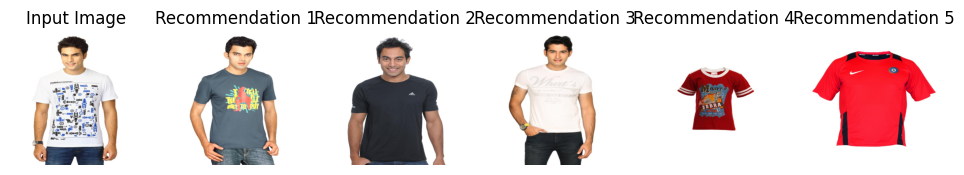

['C:\\FashionRecommendationsSystem\\Dataset\\resized_images\\7944.jpg',
 'C:\\FashionRecommendationsSystem\\Dataset\\resized_images\\2035.jpg',
 'C:\\FashionRecommendationsSystem\\Dataset\\resized_images\\7031.jpg',
 'C:\\FashionRecommendationsSystem\\Dataset\\resized_images\\37600.jpg',
 'C:\\FashionRecommendationsSystem\\Dataset\\resized_images\\11272.jpg']

In [26]:
# Test with an Example Image 
test_image = r"C:\FashionRecommendationsSystem\Dataset\resized_images\10060.jpg"
recommend_similar_items(test_image)